##  Predicting Wine Quality: Insights from Physicochemical Properties  🍷
Group 6: Felix Li, Gurman Gill, Dia Zavery, Steve He

## 1. Summary
[Summary]

## 3. Data cleaning and wrangling 

In [20]:
install.packages("tidyverse")
install.packages("GGally")
library(tidyverse)
library(dplyr)
library(GGally)

The following package(s) will be installed:
- tidyverse [2.0.0]
These packages will be installed into "~/Desktop/Projects/DSCI_310_Group_6/renv/library/R-4.3/aarch64-apple-darwin20".

# Installing packages --------------------------------------------------------
- Installing tidyverse ...                      OK [linked from cache]
The following package(s) will be installed:
- GGally [2.2.1]
These packages will be installed into "~/Desktop/Projects/DSCI_310_Group_6/renv/library/R-4.3/aarch64-apple-darwin20".

# Installing packages --------------------------------------------------------
- Installing GGally ...                         OK [linked from cache]


## 2. Introduction

Wine has been a symbol of culture and refinement throughout human history, with its production dating back thousands of years. The complexity of wine, influenced by its physicochemical properties, has fascinated scientists and winemakers alike. In recent years, the wine industry has increasingly turned to data analysis and machine learning to understand and predict wine quality. This scientific approach aims to decode the relationship between the chemical composition of wine and its quality as perceived by consumers.

In this project, our primary goal was to determine the best regression model for predicting wine quality and to identify which factors most effectively predict it. The quality of wine is a subject of interest for both enthusiasts and professionals in the field, as it can vary significantly based on a variety of measurable physicochemical properties. By applying regression analysis, we aimed to uncover the relationships between these properties and wine quality, thereby providing a predictive model that could be useful for winemakers and consumers alike. Our research question was formulated as follows: **"What is the best regression model to predict wine quality?**

To address this question, we utilized a dataset from the UCI Machine Learning Repository, specifically focusing on red and white variants of Portuguese wine. This dataset contains 4,898 instances, with each instance featuring 11 physicochemical attributes (such as alcohol percentage, various forms of acidity, sugar levels, chlorides, sulfur dioxide content, density, pH, and sulphates) and a corresponding quality score. These quality scores, ranging from 0 to 10, were assigned by wine experts and serve as our target variable.

Our approach involved conducting a comprehensive analysis to explore the relationships between the physicochemical attributes and the quality scores. Through the use of regression analysis and the implementation of a forward selection algorithm, we aimed to identify the most significant predictors of wine quality. This process allowed us to not only pinpoint the factors that have the most substantial impact on quality but also to determine the most accurate regression model for predicting the quality scores of wine based on its properties.

In [25]:
wine_data <- read.csv("data/winequality-red.csv",sep = ";")
head(wine_data)
summary(wine_data)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
6  7.4          0.66             0.00        1.8            0.075    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5      
6 5

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [26]:
levels(as.factor(data$quality))

[1] "3" "4" "5" "6" "7" "8"

In [27]:
sum(is.na(data))


[1] 0

## 4. EDA

`geom_smooth()` using formula = 'y ~ x'


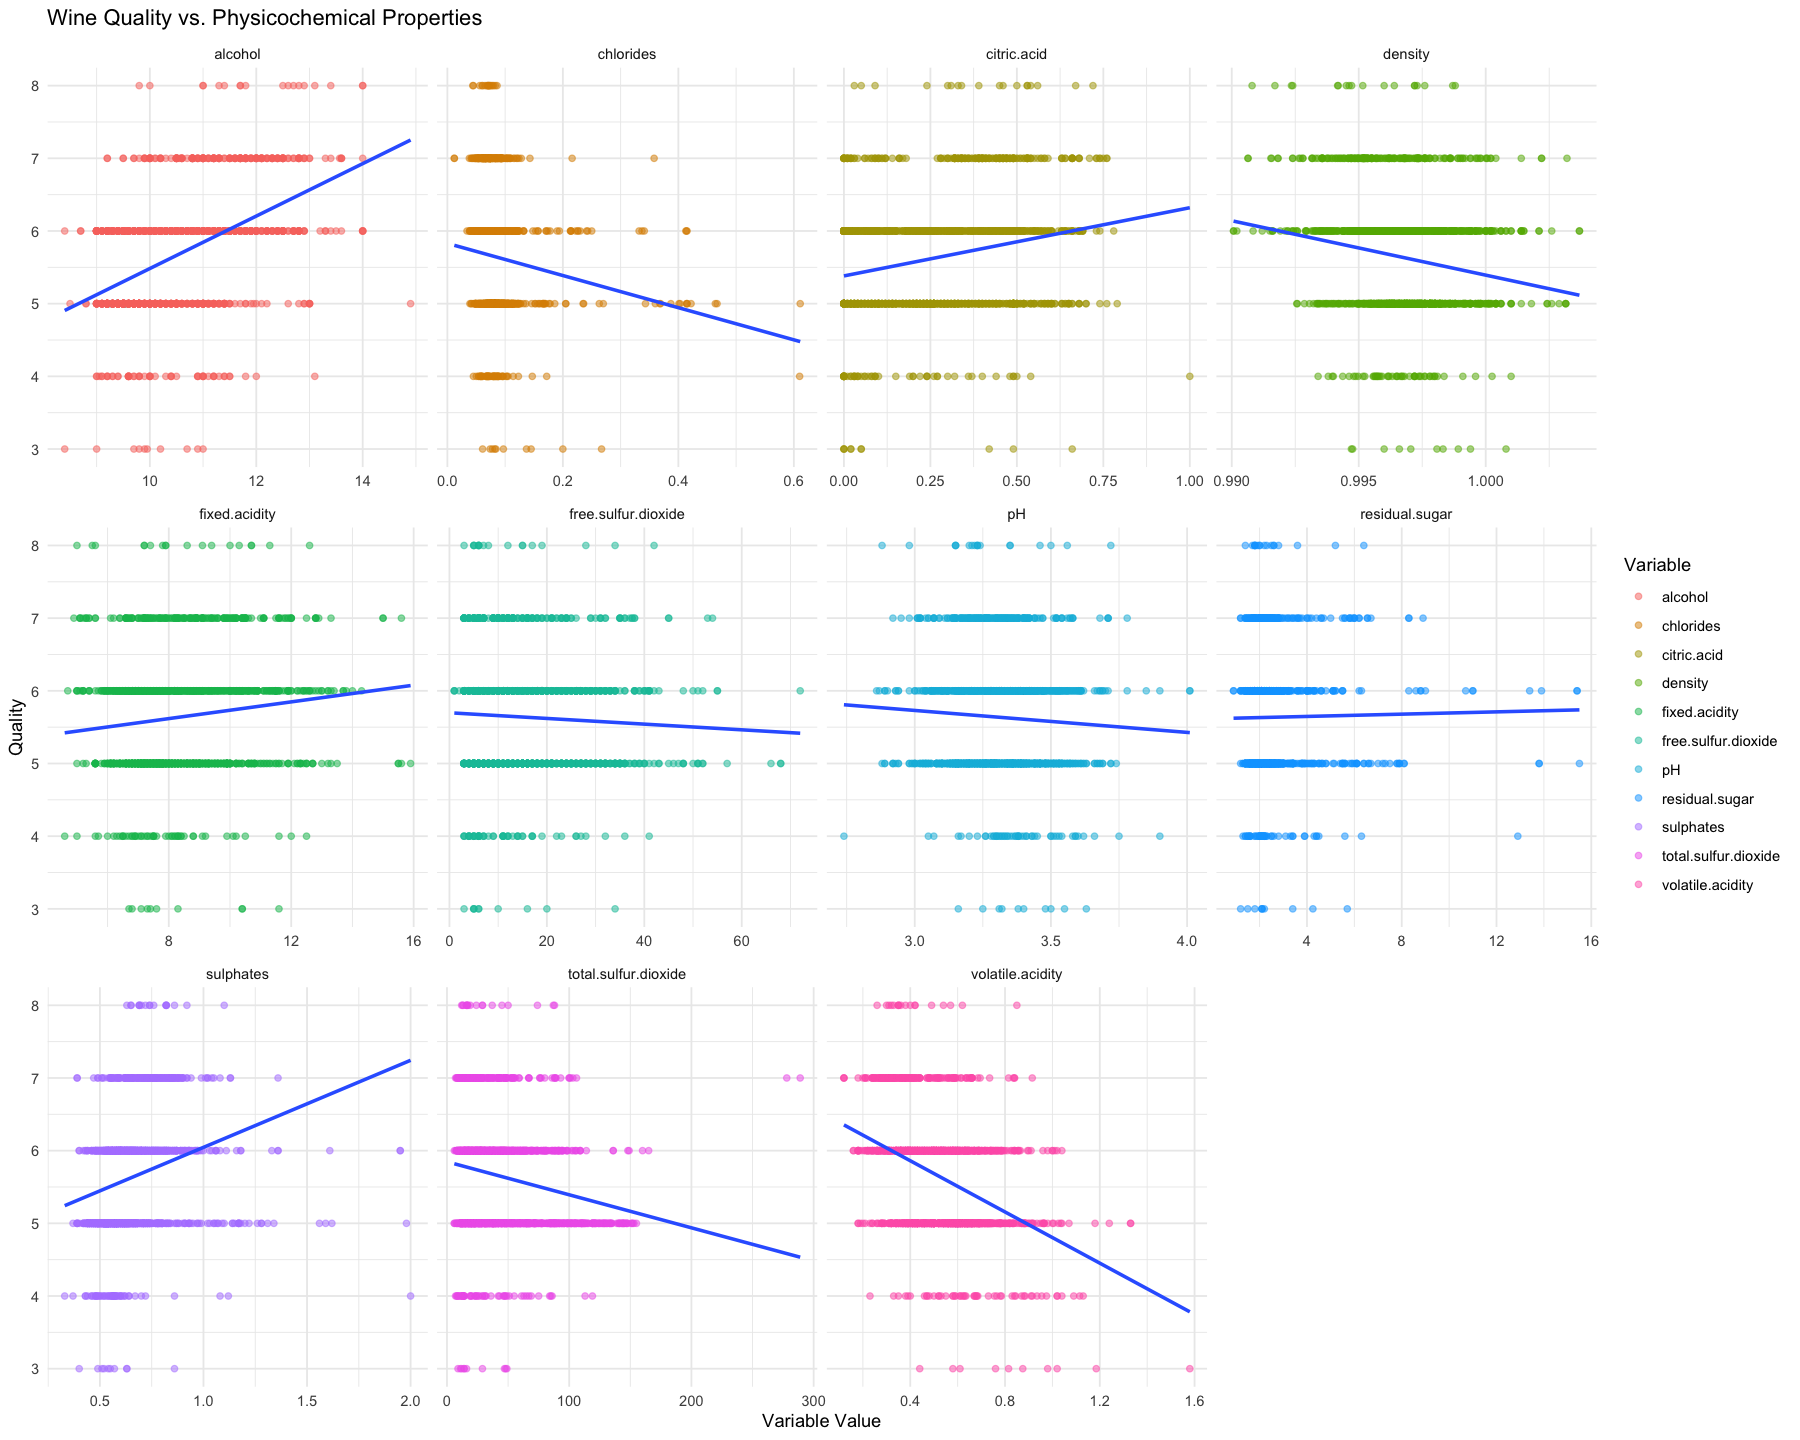

In [30]:
long_wine_data <- wine_data %>%
  pivot_longer(cols = -quality, names_to = "Variable", values_to = "Value")

ggplot(long_wine_data, aes(x = Value, y = quality)) +
  geom_point(aes(color = Variable), alpha = 0.5) +
  geom_smooth(se = FALSE, method = "lm") +
  facet_wrap(~ Variable, scales = "free_x") +
  labs(title = "Wine Quality vs. Physicochemical Properties",
       x = "Variable Value",
       y = "Quality") +
  theme_minimal()

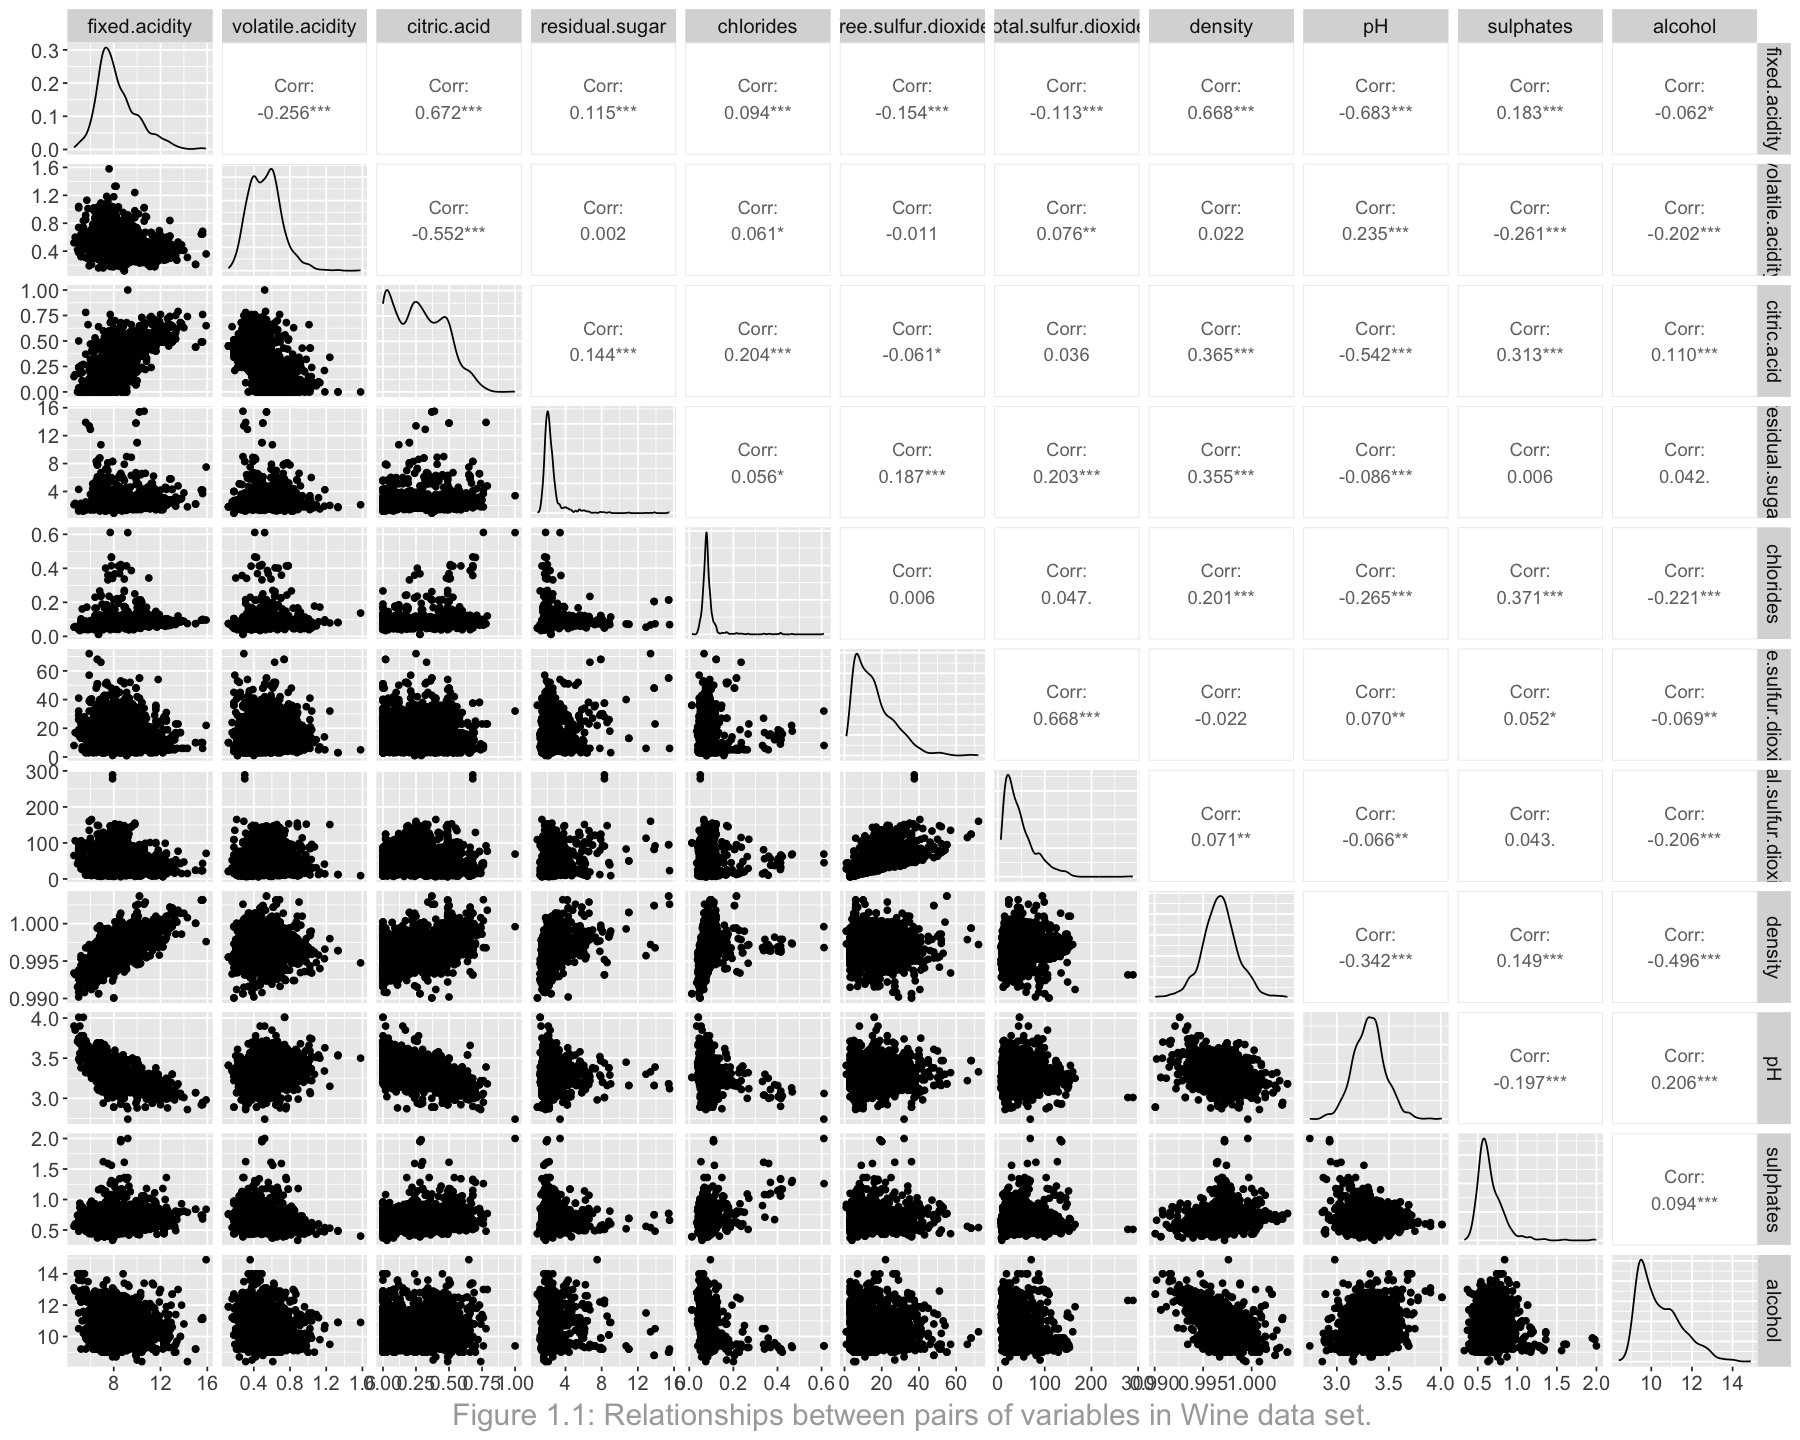

In [24]:
options(repr.plot.width = 15, repr.plot.height = 12)

correlation_plots <- data %>%
  select(- quality) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.caption = element_text(color = "darkgrey", size = 18, hjust = 0.5, vjust = 1)
  ) + 
  labs(caption = "Figure 1.1: Relationships between pairs of variables in Wine data set.")
  
  
correlation_plots

**Move the variables that has high correlation with others**


- citric.acid and fixed acidity
- PH and citric.acid
- density and fixed acidity
- free.sulfur.dioxide and total.sulfur.dioxide

we decide to remove citric.acid, density, PH and free.sulfur.dioxide 

In [ ]:
df <- subset(data, select = -c(citric.acid,density,pH,free.sulfur.dioxide))
head(df) 

## 4. Discussion
[Discussion]

## 5. References
Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.